<a href="https://colab.research.google.com/github/titli17/Nifty50-Prediction/blob/main/MyNiftyHigh%26Low.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds0=pd.read_csv("/content/Nifty50Data.csv")
ds0.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
0,1-Jan-19,10881.70,10923.60,10807.10,10910.10,159000000.0,8688.26
1,2-Jan-19,10868.85,10895.35,10735.05,10792.50,310000000.0,15352.25
2,3-Jan-19,10796.80,10814.05,10661.25,10672.25,286000000.0,15030.45
3,4-Jan-19,10699.70,10741.05,10628.65,10727.35,297000000.0,14516.74
4,7-Jan-19,10804.85,10835.95,10750.15,10771.80,269000000.0,12731.29


In [ ]:
ds0.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
1336,########,22614.10,22993.60,22577.45,22967.65,370000000.0,39157.65
1337,########,22930.75,23026.40,22908.00,22957.10,262000000.0,27966.99
1338,########,23038.95,23110.80,22871.20,22932.45,260000000.0,27204.54
1339,########,22977.15,22998.55,22858.50,22888.15,218000000.0,23054.65
1340,########,22762.75,22825.50,22685.45,22704.70,270000000.0,27549.09


In [ ]:
ds0.shape

(1341, 7)

In [ ]:
ds0.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (? Cr)    0
dtype: int64

In [ ]:
duplicate_rows=ds0.duplicated()
print(duplicate_rows.sum())

0


In [ ]:
ds0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1341 non-null   object 
 1   Open             1341 non-null   float64
 2   High             1341 non-null   float64
 3   Low              1341 non-null   float64
 4   Close            1341 non-null   float64
 5   Shares Traded    1341 non-null   float64
 6   Turnover (? Cr)  1341 non-null   float64
dtypes: float64(6), object(1)
memory usage: 73.5+ KB


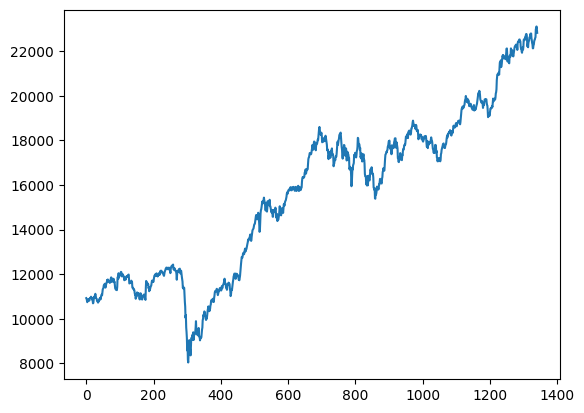

In [ ]:
plt.plot(ds0["High"])

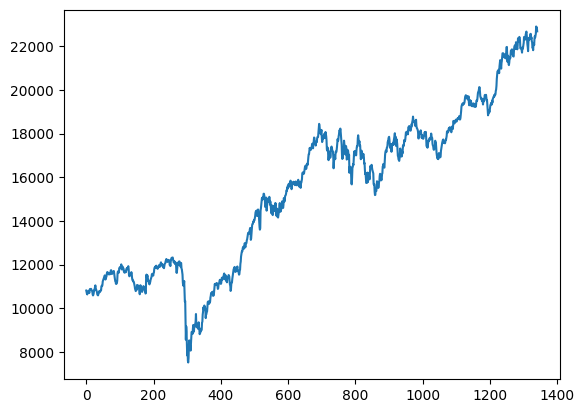

In [ ]:
plt.plot(ds0["Low"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

ds1=ds0["High"]
np1=np.array(ds1).reshape(-1,1)
model=scaler.fit(np1)
np2=model.transform(np1)
ds0["High"]=np2

ds1=ds0["Low"]
np1=np.array(ds1).reshape(-1,1)
model=scaler.fit(np1)
np2=model.transform(np1)
ds0["Low"]=np2

ds0.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (? Cr)
1336,########,22614.10,0.992225,0.978531,22967.65,370000000.0,39157.65
1337,########,22930.75,0.994401,1.000000,22957.10,262000000.0,27966.99
1338,########,23038.95,1.000000,0.997610,22932.45,260000000.0,27204.54
1339,########,22977.15,0.992553,0.996785,22888.15,218000000.0,23054.65
1340,########,22762.75,0.981073,0.985546,22704.70,270000000.0,27549.09


HIGH PREDICTION

In [ ]:
ds1=ds0["High"]
ds1=np.array(ds1).reshape(-1,1)

In [ ]:
training_size=int(len(ds1)*0.7)
test_size=len(ds1)-training_size
print(training_size,test_size)
train_data,test_data=ds1[0:training_size,:],ds1[training_size:len(ds1),:1]

938 403


In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(Y_train.shape)

(837, 100)
(837,)


(None, None)

In [ ]:
print(X_test.shape), print(Y_test.shape)

(302, 100)
(302,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 32)           4352      
                                                                 
 dropout_3 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 32)           8320      
                                                                 
 dropout_4 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=24,verbose=1)

Epoch 1/100
35/35 [==============================] - 6s 45ms/step - loss: 0.0263 - val_loss: 0.0124
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0037 - val_loss: 0.0014
Epoch 4/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0034 - val_loss: 6.8363e-04
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 6.2141e-04
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 7/100
35/35 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 5.5191e-04
Epoch 8/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 9/100
35/35 [==============================] - 1s 23ms/step - loss: 0.0025 - val_loss: 0.0079
Epoch 10/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0023 - val_

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

14126.4127056665

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

20115.360448736705

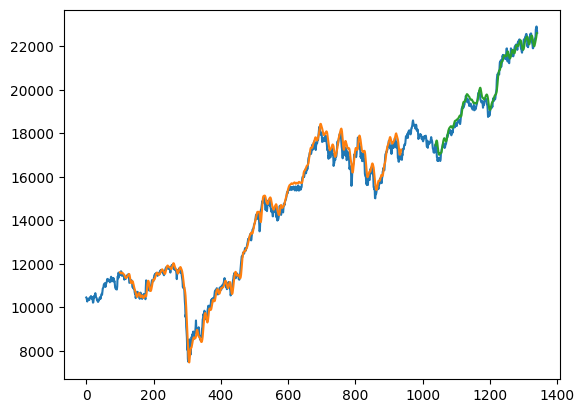

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(ds1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(ds1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(ds1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(ds1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

403

In [ ]:
X_input=test_data[303:].reshape(1,-1)
X_input.shape

(1, 100)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("\n{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape((1, n_steps, 1))
        yhat=model.predict(X_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input=X_input.reshape((1, n_steps,1))
        yhat=model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.98739547]
101

1 day input [0.90545547 0.90969792 0.9106499  0.90802947 0.90254978 0.90816547
 0.92154957 0.93397506 0.93454559 0.91645797 0.89575324 0.90445706
 0.90775416 0.90974104 0.89196854 0.8904195  0.91060346 0.9139072
 0.90915062 0.91522736 0.93472139 0.92394113 0.92308534 0.92984539
 0.92704253 0.91333667 0.91514444 0.91083897 0.91774165 0.92324788
 0.93086371 0.93869184 0.94061239 0.94285468 0.94306033 0.94604564
 0.93972011 0.94078819 0.94151129 0.93032636 0.94974741 0.95414244
 0.9555588  0.95396664 0.95929374 0.96118112 0.96124414 0.95633166
 0.95594689 0.93988264 0.93432998 0.93451573 0.92486989 0.92172537
 0.9316797  0.93829712 0.93116556 0.9391529  0.96054094 0.96146638
 0.95932028 0.96087927 0.96737396 0.96197388 0.97256839 0.97728517
 0.97776945 0.9745022  0.95466653 0.94048966 0.9479695  0.93822083
 0.95123011 0.95599996 0.95791719 0.96783503 0.96746684 0.96981528
 0.97827695 0.97344408 0.97902991 0.96537049 0.95941647 0.95076573
 0.94672562 0.93501992 0.93504314

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [ ]:
len(ds1)

1341

In [ ]:
ds3=ds1.tolist()
ds3.extend(lst_output)

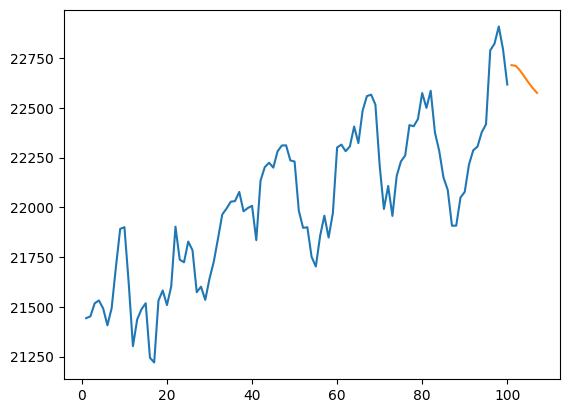

In [ ]:
plt.plot(day_new,scaler.inverse_transform(ds1[1241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

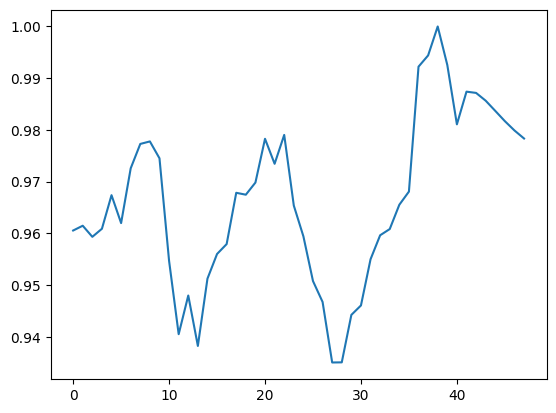

In [ ]:
plt.plot(ds3[1300:])

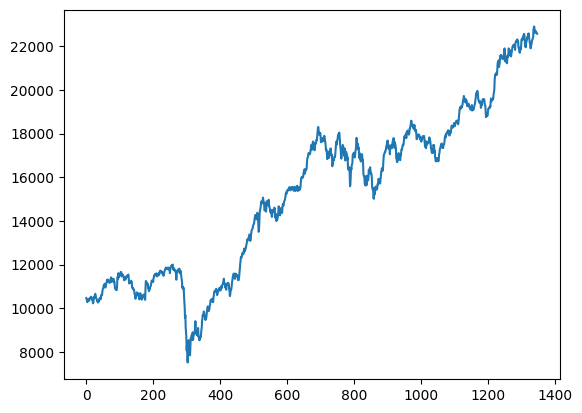

In [ ]:
ds3=scaler.inverse_transform(ds3)
plt.plot(ds3)

In [ ]:
len(ds3)

1348

In [ ]:
ds3[1341:]

array([[22713.92924082],
       [22710.17390293],
       [22687.02057463],
       [22656.65483176],
       [22626.06883446],
       [22598.36908781],
       [22574.39622951]])

LOW PREDICTION

In [ ]:
ds1=ds0["Low"]
ds1=np.array(ds1).reshape(-1,1)

In [ ]:
training_size=int(len(ds1)*0.7)
test_size=len(ds1)-training_size
print(training_size,test_size)
train_data,test_data=ds1[0:training_size,:],ds1[training_size:len(ds1),:1]

938 403


In [ ]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(Y_train.shape)

(837, 100)
(837,)


(None, None)

In [ ]:
print(X_test.shape), print(Y_test.shape)

(302, 100)
(302,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100, 32)           4352      
                                                                 
 dropout_42 (Dropout)        (None, 100, 32)           0         
                                                                 
 lstm_43 (LSTM)              (None, 100, 32)           8320      
                                                                 
 dropout_43 (Dropout)        (None, 100, 32)           0         
                                                                 
 lstm_44 (LSTM)              (None, 32)                8320      
                                                                 
 dropout_44 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)              

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=24,verbose=1)

Epoch 1/100
35/35 [==============================] - 6s 44ms/step - loss: 0.0241 - val_loss: 0.0333
Epoch 2/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 4/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0034 - val_loss: 8.7326e-04
Epoch 6/100
35/35 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 7/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 8/100
35/35 [==============================] - 1s 21ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 9/100
35/35 [==============================] - 1s 22ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 10/100
35/35 [==============================] - 1s 21ms/step - loss: 0.0024 - val_loss: 0.

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#math.sqrt(mean_squared_error(Y_train,train_predict))

In [ ]:
#math.sqrt(mean_squared_error(Y_test,test_predict))

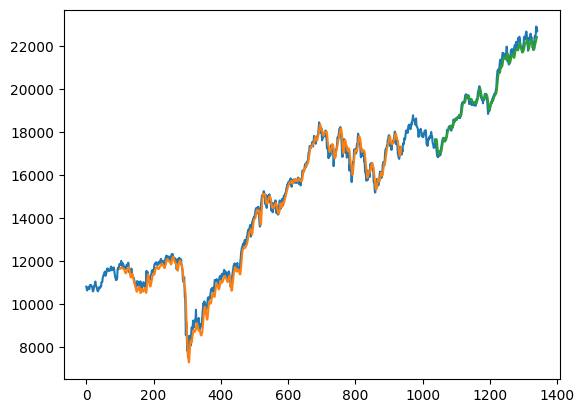

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(ds1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(ds1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(ds1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(ds1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
X_input=test_data[303:].reshape(1,-1)
X_input.shape

(1, 100)

In [ ]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):

    if(len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("\n{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape((1, n_steps, 1))
        yhat=model.predict(X_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input=X_input.reshape((1, n_steps,1))
        yhat=model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9740559]
101

1 day input [0.91274542 0.91694432 0.90809189 0.90971234 0.90521793 0.91464191
 0.92252661 0.93865973 0.93906566 0.91182965 0.89462489 0.91342413
 0.91126785 0.88858796 0.88498984 0.89212439 0.90398067 0.90866993
 0.90523092 0.91886354 0.92839792 0.923293   0.92398145 0.93194409
 0.91928895 0.91698978 0.91340789 0.91136852 0.91051445 0.92769973
 0.93901045 0.94239425 0.94400496 0.94089395 0.93292481 0.95311394
 0.94590794 0.9465899  0.9355617  0.93197657 0.94412836 0.9648663
 0.96429801 0.95850788 0.9555982  0.96895479 0.96098241 0.95765381
 0.93489923 0.93566887 0.93659113 0.93560717 0.92758932 0.92220512
 0.93721463 0.93344764 0.93762056 0.9444596  0.95165261 0.96880866
 0.96623671 0.96353162 0.96075833 0.96879891 0.9767713  0.98079159
 0.98478265 0.97374471 0.95788438 0.94618722 0.93853958 0.92658587
 0.95389656 0.96372322 0.96596718 0.96085251 0.96606784 0.96972767
 0.97794361 0.97790789 0.96363229 0.96762011 0.95609831 0.95305549
 0.9366366  0.93779917 0.92940462 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [ ]:
ds3=ds1.tolist()
ds3.extend(lst_output)

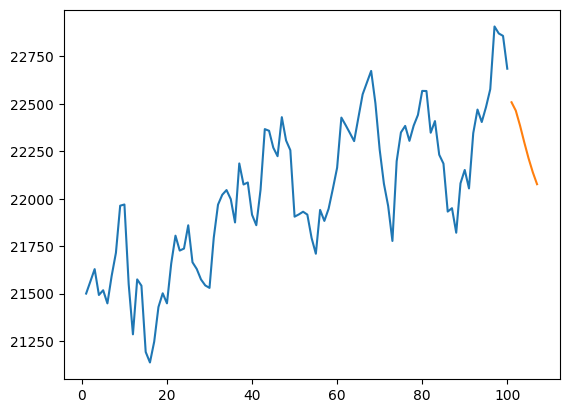

In [ ]:
plt.plot(day_new,scaler.inverse_transform(ds1[1241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

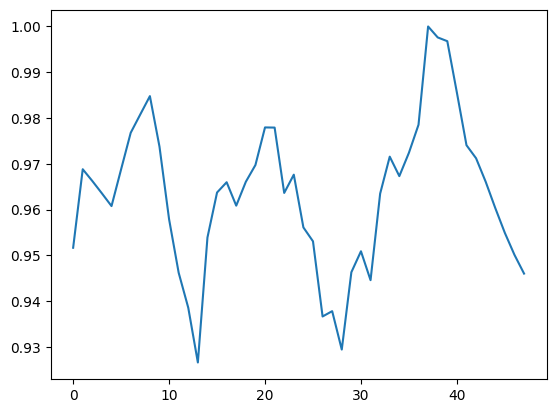

In [ ]:
plt.plot(ds3[1300:])

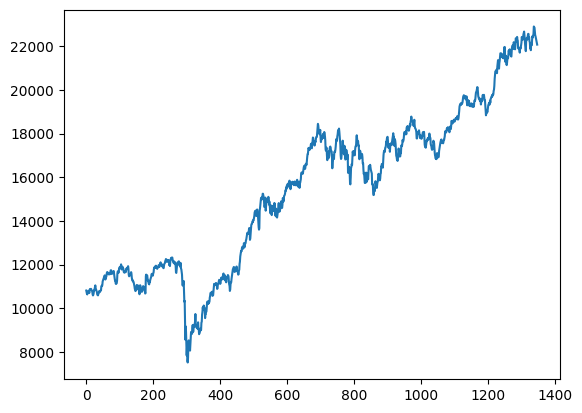

In [ ]:
ds3=scaler.inverse_transform(ds3)
plt.plot(ds3)

In [ ]:
ds3[1341:]

array([[22508.54107529],
       [22464.60766007],
       [22385.70151366],
       [22297.22164174],
       [22213.46989807],
       [22139.79846507],
       [22076.71209247]])